<h1 style="text-align:center"> U.S. Medical Insurance Costs </h1>
<h3 style="text-align:center"> A Codecademy Portfolio Project </h3>
<br>
This project is one of the portfolio projects that I completed as part of Codecademy's Data Science career path. It uses a Kaggle data set of health insurance cost and policy beneficiary information to investigate several questions about costs, BMI, and smoking status; I then try my hand at fitting two different regression models to the data.<br>
<br>
Unlike previous Codecademy portfolio/capstone projects, this one came with no explicit directions other than to come up with some questions and answer them. I decided to answer the following questions regarding this data set: 
<ol>
    <li> Are insurance costs higher on average in some regions than in others?</li>
    <li> How does BMI vary with region? If you have kids, are you more likely to have a bigger BMI? </li>
    <li> Are customers in one region more likely to smoke than customers in another region? </li>
    <li> Codecademy Hint: What's the average age of someone in the dataset? My extension: What are the average ages per region? </li>
    <li> Using the formula from previous Codecademy lessons, if I calculate the projected insurance costs for these beneficiaries how far off am I? </li>
    <li> Can I fit a multi-variable linear regression model to the data and/or KNNR model to the data to do better than the Codecademy predictive formula? Further, is the Codecademy predicted formula just a multi-variable linear regression fit to the data? </li>
</ol>
In my final report, I will address two additional questions:
<ol>
    <li> Can I use the results of my analysis to help people reduce their insurance costs?</li>
    <li> What might health insurance companies want to know based on this information? </li>
</ol> 
In what follows, I will refer to the primary beneficiary as "customer," and the medical costs billed by the beneficiary's health insurance as "charges." 
<br>

I am including my code here so that visitors to my GitHub can clearly see what I did and how I approached the project. Since the data set provided by Codecademy is an open database in the public domain (https://www.kaggle.com/mirichoi0218/insurance), I will also include the database in the repository.


<h2> Importing the data, as well as necessary Python packages </h2>
<br>
In order to answer the questions posed above, I will need to import the data itself. I will also need to import some Python packages to aid in my analysis. The code below accomplishes these tasks.

In [1]:
# Import general data analysis and plotting packages:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Import hypothesis-testing functions:
from scipy.stats import ks_2samp, f_oneway, ttest_ind, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Import machine learning preprocessing methods:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import supervised machine learning regression methods: 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Import the data itself, as provided by Codecademy:
insurance_data = pd.read_csv('insurance.csv')

<h2> Investigating the data </h2>
<br>
Now that the data set has been imported, I will take a look at it. This will allow me to see how the data is organized and what sorts of data the .csv file I was provided with contains. I came up with questions 1, 2, and 3 after looking at the header information. I borrowed question 4 from a Codecademy hint. Also, I remembered from previous lessons that Codecademy had provided me with an equation for predicting charges, so I wanted to grab that equation from the lessons and include it in my DataFrame. This led naturally to my question 6.

In [3]:
# Look at the header information:
print(insurance_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# See how many rows are in the DataFrame:
print('Number of rows: ' + str(len(insurance_data)))

Number of rows: 1338


As I mentioned above, I wanted to use the equation Codecademy provided in previous lessons based on this data set to predict what charges should be for each customer in the data set. In order to do this, however, I needed to turn the information in both the "sex" and "smoker" columns into integers, according to the convention used in those previous Codecademy lessons. I decided to make new columns with this "mapped" information, and first set about mapping the text in the "sex" and "smoker" columns to 0 or 1. Then, I copied Codecademy's equation to a lambda function and applied it to my DataFrame. Lastly, I calculated how different the predicted charges were from the actual charges. I didn't do much with this latter column, but a brief glance at the header shows that for the most part, those predictions are pretty far off. This answers Question 5 of the questions I posed above.

In [5]:
# Map the "sex" and "smoker" data to 0 or 1:
insurance_data['sex_mapped'] = insurance_data.sex.map({"male": 1, "female": 0})
insurance_data['smoker_mapped'] = insurance_data.smoker.map({"yes": 1, "no": 0})

# Write a lambda function for predicting insurance charges:
calc_costs = lambda row: (250.0*row.age) - (128.0*row.sex_mapped) + (370.0*row.bmi) +\
                         (425.0*row.children) + (24000.0*row.smoker_mapped) - 12500.0

# Apply the lambda function to the DataFrame:
insurance_data['predicted_charges'] = insurance_data.apply(calc_costs, axis = 1)

# Calculate the difference between the actual and predicted charges:
insurance_data['delta_charges'] = insurance_data.apply(lambda row: row.charges - row.predicted_charges, axis = 1)

In [6]:
# Print the updated header to make sure nothing has gone wrong:
print(insurance_data.head())

   age     sex     bmi  children smoker     region      charges  sex_mapped  \
0   19  female  27.900         0    yes  southwest  16884.92400           0   
1   18    male  33.770         1     no  southeast   1725.55230           1   
2   28    male  33.000         3     no  southeast   4449.46200           1   
3   33    male  22.705         0     no  northwest  21984.47061           1   
4   32    male  28.880         0     no  northwest   3866.85520           1   

   smoker_mapped  predicted_charges  delta_charges  
0              1           26573.00    -9688.07600  
1              0            4791.90    -3066.34770  
2              0            7857.00    -3407.53800  
3              0            4022.85    17961.62061  
4              0            6057.60    -2190.74480  


At this point, I had a sneaking suspicion that Codecademy was fitting a multi-variable linear regression model to the data in order to arrive at their equation for predicted charges, which I had dutifully copied for my own DataFrame. I then added question 6 to the above to the list of questions I wanted to answer based on an analysis of this data set.
<br>
<br>
Next, I wanted to take a look at the data as a whole. What does the age distribution look like? How about the BMI distribution? What are the relative numbers of smokers compared to non-smokers? Are there more males than females in the data set? A series of plots was definitely in order. I wanted to practice making a figure with more than one plot in it, so I decided to construct my figure as in the code below. And since I knew I wanted to write up a report about my findings, I made sure to output the figure to a file for future use.

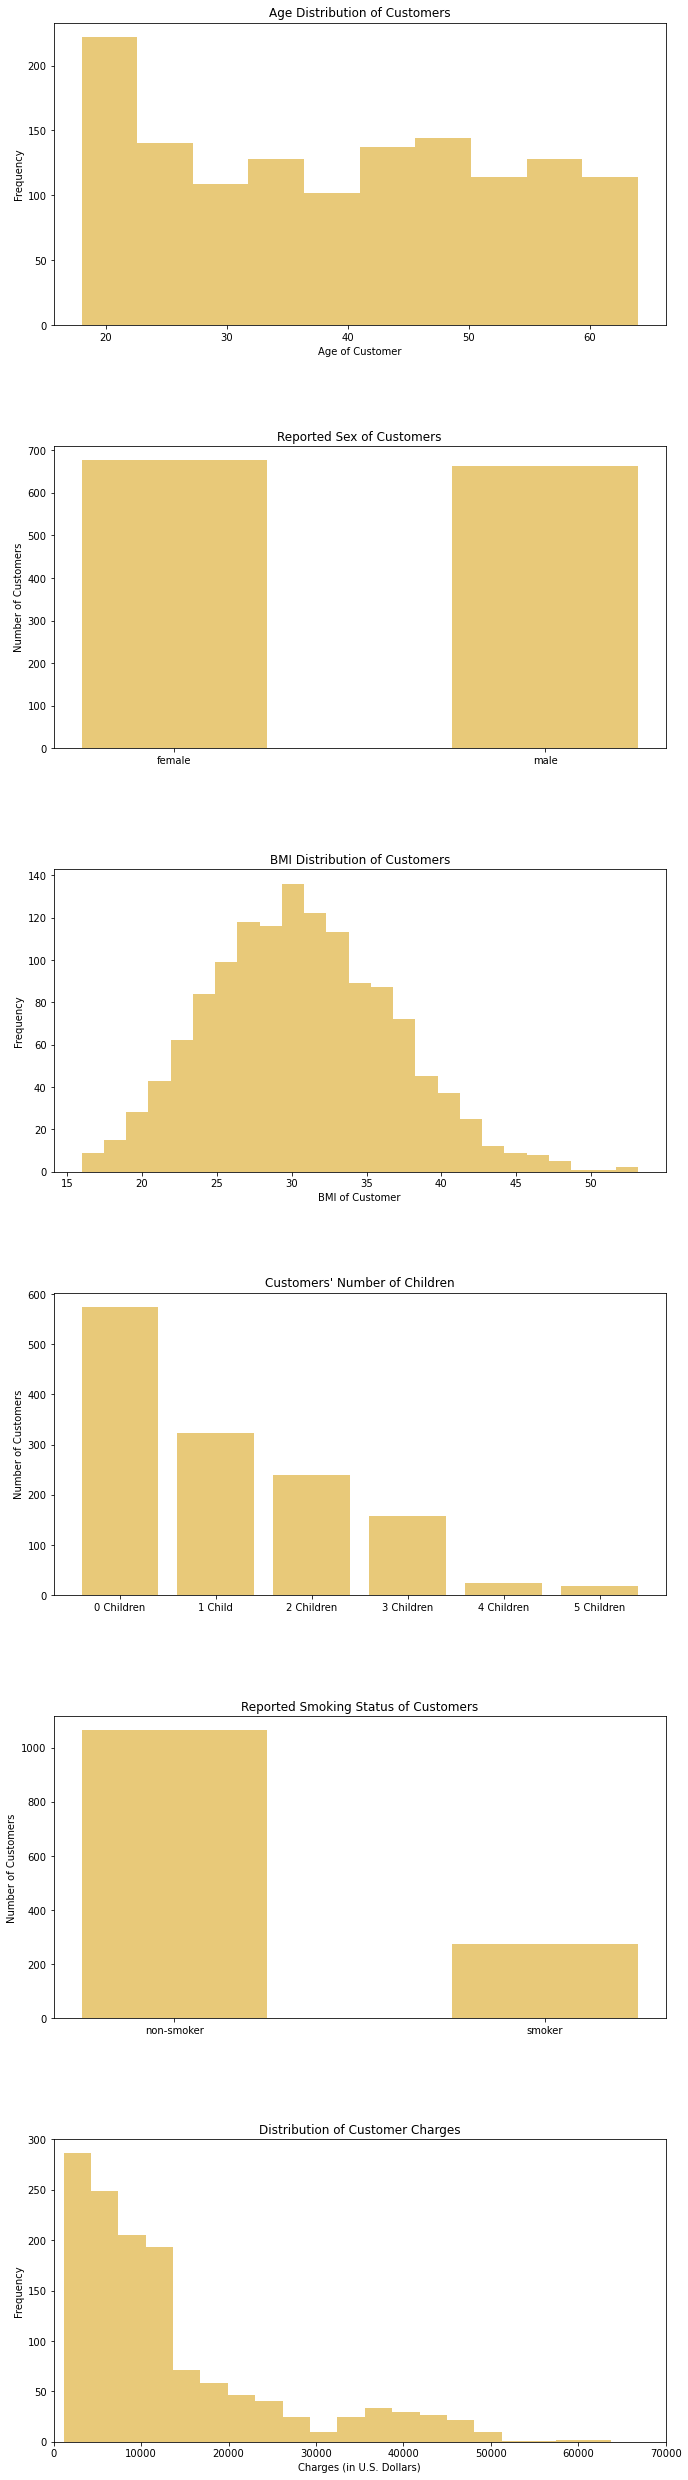

In [7]:
# Set up the figure and the margins for each subplot:
fig1 = plt.figure(figsize=(10,48))
fig1.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.2, top = 0.9, hspace = 0.4, wspace = 0)
# Plot the age distribution:
fig1.add_subplot(6,1,1)
plt.hist(insurance_data.age, bins = 10, color = 'goldenrod', alpha = 0.6)
plt.xlabel('Age of Customer')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
# Plot the number of females (0) and the number of males (1) as a bar plot:
fig1.add_subplot(6,1,2)
plt.bar([0.25,0.75], insurance_data.sex_mapped.value_counts(), width = 0.25, color = 'goldenrod', alpha = 0.6, \
       tick_label = ['female', 'male'])
plt.title('Reported Sex of Customers')
plt.ylabel('Number of Customers')
# Plot the BMI distribution:
fig1.add_subplot(6,1,3)
plt.hist(insurance_data.bmi, bins = 25, color = 'goldenrod', alpha = 0.6)
plt.xlabel('BMI of Customer')
plt.ylabel('Frequency')
plt.title('BMI Distribution of Customers')
# Plot the number of non-smokers (0) and the number of smokers (1) as a bar plot:
fig1.add_subplot(6,1,4)
plt.bar(range(6), insurance_data.children.value_counts(), color = 'goldenrod', alpha = 0.6, \
       tick_label = ['0 Children', '1 Child', '2 Children', '3 Children', '4 Children', '5 Children'])
plt.title("Customers' Number of Children")
plt.ylabel('Number of Customers')
# Plot the number of customers with 0, 1, 2, 3, 4, or 5 children as a bar plot:
fig1.add_subplot(6,1,5)
plt.bar([0.25,0.75], insurance_data.smoker_mapped.value_counts(), width = 0.25, color = 'goldenrod', alpha = 0.6, \
       tick_label = ['non-smoker', 'smoker'])
plt.title('Reported Smoking Status of Customers')
plt.ylabel('Number of Customers')
# Plot the charges distribution:
fig1.add_subplot(6,1,6)
plt.hist(insurance_data.charges, bins = 20, color = 'goldenrod', alpha = 0.6)
plt.axis([0,70000,0,300])
plt.xlabel('Charges (in U.S. Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Charges')
plt.savefig('figure_1_all_data.png')
plt.show()
plt.close('all')

This is what I took away from these plots:
1. The age distribution is approximately flat, save for a spike of customers in their early 20s.
2. The number of males and females is approximately equal, with just a few more females than males.
3. The BMI distribution is approximately Gaussian with a somewhat wide standard deviation.
4. Childless customers are the most common; customers with 4 or more children are rare. The bar graph seems to follow a decaying exponential.
5. There are many more non-smokers than there are smokers.
6. The charges distribution is very interesting. That ain't no Gaussian, and it's not quite following an exponential decay either. The biggest peak in the distribution is between \\$0 and ~\\$12,000, followed by a steep drop-off, and another peak between ~\\$35,000 and ~\\$ 50,000. Though beyond the scope of what I want to do with this project, it would be interesting to see what sort of functional form this distribution follows.

<h2> Question 1: Are insurance costs higher on average in some regions than in others? </h2>
<br>
In order to address this question, it will be handy to know how many customers live in each of the four regions identified by the data set compiler. I accomplish this below.

In [8]:
# Determine how many customers live in which region:
print(insurance_data.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


There are approximately equal numbers of customers in each region, save for the Southeast which has 40 or so more customers than the other regions. 

I now split the full DataFrame into 4 smaller ones, one for each of the four regions in the data set:

In [9]:
# Split the data into separate DataFrames by region:
ne_insurance_data = insurance_data[insurance_data.region == 'northeast']
se_insurance_data = insurance_data[insurance_data.region == 'southeast']
nw_insurance_data = insurance_data[insurance_data.region == 'northwest']
sw_insurance_data = insurance_data[insurance_data.region == 'southwest']

# Print out the number of rows to make sure nothing has gone wrong:
print(len(ne_insurance_data), len(se_insurance_data), len(nw_insurance_data), len(sw_insurance_data))

324 364 325 325


I will now look at the charges distribution for the data in each region's DataFrame. I'll put all the distributions on one plot for easier comparison, and once again output the figure to a file for later use.

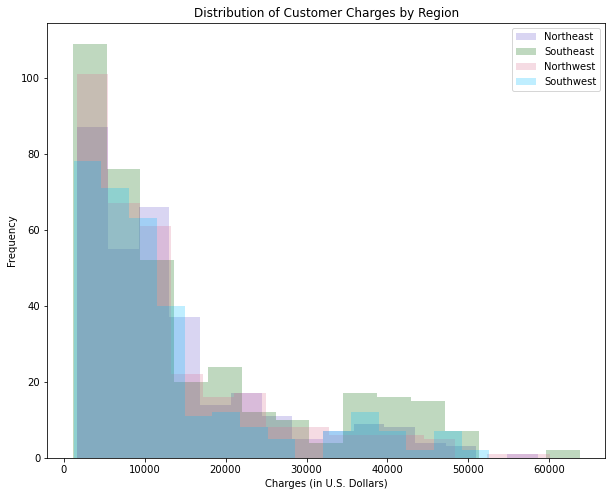

In [10]:
plt.figure(figsize=(10,8))
plt.hist(ne_insurance_data.charges, bins = 15, histtype = 'bar', alpha = 0.25, color = 'slateblue')
plt.hist(se_insurance_data.charges, bins = 15, histtype = 'bar', alpha = 0.25, color = 'darkgreen')
plt.hist(nw_insurance_data.charges, bins = 15, histtype = 'bar', alpha = 0.25, color = 'palevioletred')
plt.hist(sw_insurance_data.charges, bins = 15, histtype = 'bar', alpha = 0.25, color = 'deepskyblue')
plt.legend(['Northeast', 'Southeast', 'Northwest', 'Southwest'])
plt.title('Distribution of Customer Charges by Region')
plt.xlabel('Charges (in U.S. Dollars)')
plt.ylabel('Frequency')
plt.savefig('figure_2_regional_charges.png')
plt.show()
plt.close('all')

Overall, the distributions of each of the regions are similar, and similar to the overall charges distribution. The only two things of note are that the secondary peak between ~\\$35,000 and ~\\$50,000 seems to be a bit higher for the Southeast distribution than for any other distribution, and that the drop-off after ~\\$12,000 seems to be a bit less steep for the Northeast distribution. By eye at least, I would say that these distributions are not significantly different from each other.<br>
However, it is dangerous to draw firm conclusions about how similar or dissimilar two or more distributions are by just looking at them. I should perform a Kolmogorov-Smirnov (K-S) test on each pair of distributions to say for sure whether they are similar or dissimilar. (I use a I K-S test rather than ANOVA because these distributions are obviously not Gaussian.) I do this below. I need to pick a p-value ahead of time to decide whether or not to reject the null hypothesis that two distributions are drawn from the same continuous distribution. I know the usually accepted level is 0.05, but I'm more of a 3-$\sigma$ girl myself, so I will choose a p-value of 0.003 as my threshold.

In [11]:
ksstat_nese, kspval_nese = ks_2samp(ne_insurance_data.charges,se_insurance_data.charges)
ksstat_nenw, kspval_nenw = ks_2samp(ne_insurance_data.charges,nw_insurance_data.charges)
ksstat_nesw, kspval_nesw = ks_2samp(ne_insurance_data.charges,sw_insurance_data.charges)
    
ksstat_senw, kspval_senw = ks_2samp(se_insurance_data.charges,nw_insurance_data.charges)
ksstat_sesw, kspval_sesw = ks_2samp(se_insurance_data.charges,sw_insurance_data.charges)

ksstat_nwsw, kspval_nwsw = ks_2samp(nw_insurance_data.charges,sw_insurance_data.charges)

print('K-S test p-values:')
print('Northeast and Southeast: ' + str(round(kspval_nese,3)))
print('Northeast and Northwest: ' + str(round(kspval_nenw,3)))
print('Northeast and Southwest: ' + str(round(kspval_nesw,3)))
print('Southeast and Northwest: ' + str(round(kspval_senw,3)))
print('Southeast and Southwest: ' + str(round(kspval_sesw,3)))
print('Northwest and Southwest: ' + str(round(kspval_nwsw,3)))


K-S test p-values:
Northeast and Southeast: 0.195
Northeast and Northwest: 0.175
Northeast and Southwest: 0.049
Southeast and Northwest: 0.057
Southeast and Southwest: 0.03
Northwest and Southwest: 0.702


Note that I only need to perform one test between pairs of distributions, so that cuts down on the total number of tests that I need to do.<br>
What are the results of all these tests? As I suspected, the distributions are all similar to each other. At the significance level I chose ahead of time, the null hypothesis that the two distributions being tested are in fact drawn from the same continuous distribution should not be rejected. Thus at least in this case, my eyes were not deceiving me when they said that the distributions were pretty much the same.<br>
<br>
Well, this has been some nice statistical analysis, but I haven't answered my question yet. One way to tell if insurance costs are higher on average in some regions than in others is to simply calculate the averages for each region:

In [12]:
avg_ne_insurance_costs = round(np.mean(ne_insurance_data.charges),2)
avg_se_insurance_costs = round(np.mean(se_insurance_data.charges),2)
avg_nw_insurance_costs = round(np.mean(nw_insurance_data.charges),2)
avg_sw_insurance_costs = round(np.mean(sw_insurance_data.charges),2)

print('Average charges for customers living in the Northeast: ${}'.format(avg_ne_insurance_costs))
print('Average charges for customers living in the Southeast: ${}'.format(avg_se_insurance_costs))
print('Average charges for customers living in the Northwest: ${}'.format(avg_nw_insurance_costs))
print('Average charges for customers living in the Southwest: ${}'.format(avg_sw_insurance_costs))

Average charges for customers living in the Northeast: $13406.38
Average charges for customers living in the Southeast: $14735.41
Average charges for customers living in the Northwest: $12417.58
Average charges for customers living in the Southwest: $12346.94


So at least at first glance, it appears as though costs are highest for customers living in the Southeast, and lowest for customers living in the Southwest. The average charges for the Northwest and Southwest are pretty much the same, and only about \\$1,000 higher than the average charge in the Northeast. The average charge for the Southeast is much higher than that. <br>
I'd normally want to look at the standard deviation of each distribution and see if the averages fall within each others’ standard deviations, but these distributions certainly aren't Gaussian so finding the standard deviation isn't the best measure of "spread" in the data. I think it's better to look at the interquartile range to see the "spread" in this case, and if I'm doing that I might as well do box plots of each charges distribution. However, note that a box plot will plot the median charge of each distribution, not the mean charge, so why don't I calculate the median charges for comparison:

In [13]:
avg_ne_insurance_costs = round(np.median(ne_insurance_data.charges),2)
avg_se_insurance_costs = round(np.median(se_insurance_data.charges),2)
avg_nw_insurance_costs = round(np.median(nw_insurance_data.charges),2)
avg_sw_insurance_costs = round(np.median(sw_insurance_data.charges),2)

print('Median charges for customers living in the Northeast: ${}'.format(avg_ne_insurance_costs))
print('Median charges for customers living in the Southeast: ${}'.format(avg_se_insurance_costs))
print('Median charges for customers living in the Northwest: ${}'.format(avg_nw_insurance_costs))
print('Median charges for customers living in the Southwest: ${}'.format(avg_sw_insurance_costs))

Median charges for customers living in the Northeast: $10057.65
Median charges for customers living in the Southeast: $9294.13
Median charges for customers living in the Northwest: $8965.8
Median charges for customers living in the Southwest: $8798.59


This is very interesting! It is unsurprising that right-skew distributions will have higher averages than medians, but here the median charge for customers in the Northeast is much higher than that of other customers! The median charges for customers in the Northwest and Southwest are almost the same, unsurprisingly, and the median charge for customers in the Southeast is only modestly higher than that. So this tells me that the second peak of the Southeast charges distribution is dragging the average up, unsurprisingly, and that the comparatively shallow drop-off of the Northeast's charge distribution after ~\\$12,000 or so is dragging the median charge up. 

Now I will make box plots of the charges distribution for each region.

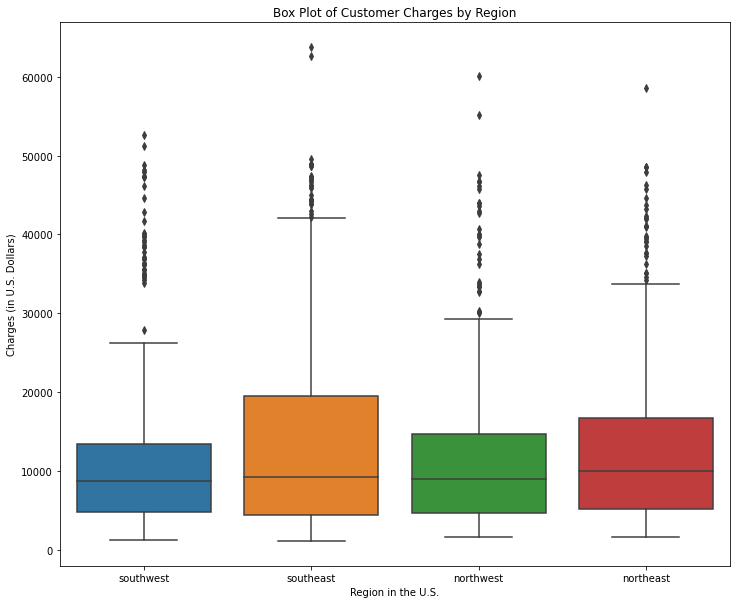

In [14]:
plt.figure(figsize=(12, 10))
sns.boxplot(data = insurance_data, x="region", y="charges")
plt.title('Box Plot of Customer Charges by Region')
plt.xlabel('Region in the U.S.')
plt.ylabel('Charges (in U.S. Dollars)')
plt.savefig('figure_3_charges_boxplot.png')
plt.show()
plt.close('all')

From the above figure, I see that the interquartile range for the Southeast charges distribution extends to higher charges than the other distributions; this is likely due to the higher second peak between charges of ~\\$35,000 and ~\\$50,000 that I noted above. And it is easy to see that the median charge for the Northeast distribution is higher than the median charges of the other three distributions, which are all similar. <br>
<br>
Taking all of these things as a whole, I'd say that average and median costs for customers in the Northeast and Southeast are higher than those for customers in the Southwest and Northwest; in the latter two regions, the two average costs are practically identical and the two median costs are practically identical. Comparatively more customers in the second peak of the Southeast charge distribution drag up the average, whereas the comparatively shallower drop-off after the first peak of the Northeast distribution drags up the median. <br>
<br>
In short, yes, insurance costs tend to be higher in the East and lower in the West.

<h2> Question 2a: How does BMI vary with region? </h2>

If I have understood correctly from various news and internet articles that I've read over the years, body mass index (i.e. BMI) varies with region in the country. BMIs tend to be highest in the Southeast but lower the Northeast and Northwest. Since this data set contains information for both BMI and customer region, I can use it to determine if the BMIs of customers in the Southeast do in fact tend to be higher than the BMIs of customers in the other regions.

Since I already divided customers up into separate DataFrames by region to answer Question 1, I don't need to repeat that process here. Thus, I can start off by plotting the BMI distribution of each region to see what it looks like and how it compares to the distributions of the other regions.

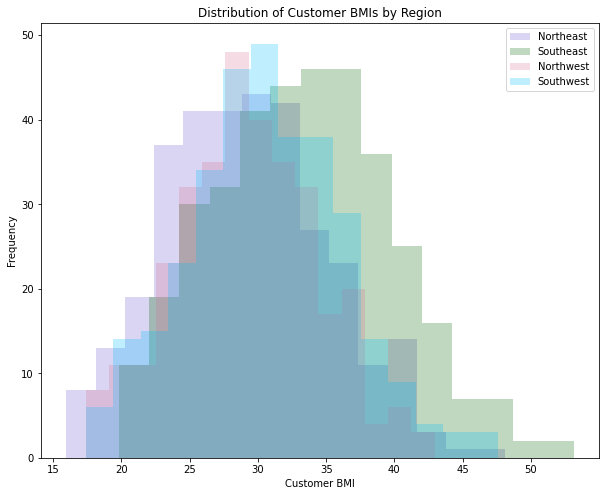

In [15]:
plt.figure(figsize=(10,8))
plt.hist(ne_insurance_data.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'slateblue')
plt.hist(se_insurance_data.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'darkgreen')
plt.hist(nw_insurance_data.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'palevioletred')
plt.hist(sw_insurance_data.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'deepskyblue')
plt.legend(['Northeast', 'Southeast', 'Northwest', 'Southwest'])
plt.title('Distribution of Customer BMIs by Region')
plt.xlabel('Customer BMI')
plt.ylabel('Frequency')
plt.savefig('figure_4_regional_bmi.png')
plt.show()
plt.close('all')

Just like the overall BMI distribution, these regional BMI distributions are approximately Gaussian. That will make life a bit easier when performing hypothesis tests to say whether they are significantly different or not! Even by eye, it's clear to see that the Southeast BMI distribution is shifted toward higher BMIs than the other distributions. I daresay I will find that it is significantly different from the other distributions. The Northeast BMI distribution looks to be a tiny bit asymmetric, with more low BMIs than high BMIs. The peaks of the Northwest and Southwest BMI distributions look to be slightly different, although I don't think that will end up being significant, and their shapes are largely the same.<br>
Now I will test to see if the Southeast BMI distribution is in fact significantly different from the others. Since the data is normally distributed, I'd like to do an ANOVA test, but should make sure that the ratios of standard deviations are approximately 1. Let me check that now:

In [16]:
# check to see how different the stddevs of each distribution are:
ne_bmi_stddev = np.std(ne_insurance_data.bmi)
se_bmi_stddev = np.std(se_insurance_data.bmi)
nw_bmi_stddev = np.std(nw_insurance_data.bmi)
sw_bmi_stddev = np.std(sw_insurance_data.bmi)

print('Ratios of Standard Deviations of BMI Distributions:')
print('Northeast and Southeast: ' + str(ne_bmi_stddev/se_bmi_stddev))
print('Northeast and Northwest: ' + str(ne_bmi_stddev/nw_bmi_stddev))
print('Northeast and Southwest: ' + str(ne_bmi_stddev/sw_bmi_stddev))
print('Southeast and Northwest: ' + str(se_bmi_stddev/nw_bmi_stddev))
print('Southeast and Southwest: ' + str(se_bmi_stddev/sw_bmi_stddev))
print('Northwest and Southwest: ' + str(nw_bmi_stddev/sw_bmi_stddev))

Ratios of Standard Deviations of BMI Distributions:
Northeast and Southeast: 0.9164597403282666
Northeast and Northwest: 1.1558802218577884
Northeast and Southwest: 1.043158172680162
Southeast and Northwest: 1.261244952717469
Southeast and Southwest: 1.138247679386891
Northwest and Southwest: 0.9024794723137889


For the most part, the ratios of standard deviations (standard deviation is usually denoted by $\sigma$ in physics) are approximately 1. However, the ratio of Southeast $\sigma$  to Northwest $\sigma$  is about 1.3, which is a little higher than the standard threshold of 1.1 or so. I'll go ahead and run the ANOVA test anyway, but the fact that the standard deviation ratio for the Southeast and Northwest distributions is a little higher than 1 should be borne in mind. I will once again choose a significance level for rejecting the null hypothesis ahead of time; that threshold p-value will again be 0.003.

In [17]:
# Perform ANOVA hypothesis test to see if the green histogram is significantly different from the other three:
anova_stat, anova_p_value = f_oneway(ne_insurance_data.bmi, se_insurance_data.bmi, nw_insurance_data.bmi, \
                                   sw_insurance_data.bmi)
print('ANOVA p-value: ' + str(anova_p_value))

ANOVA p-value: 1.881838913929143e-24


Yeah, I'd say that indicates a significant difference between at least one distribution and at least one other distribution. The ANOVA test is great for testing to see if one distribution's mean is significantly different from at least one other mean, but not which precise mean(s) is/are different. To determine this, I will perform a Tukey Range test with the same significance threshold as above.

In [18]:
# Perform a Tukey Range Test to see which one(s) are differrent from the other(s):
bmis = np.concatenate([ne_insurance_data.bmi, se_insurance_data.bmi, nw_insurance_data.bmi, sw_insurance_data.bmi])
labels = ['NE'] * len(ne_insurance_data.bmi) + ['SE'] * len(se_insurance_data.bmi) +\
         ['NW'] * len(nw_insurance_data.bmi) + ['SW'] * len(sw_insurance_data.bmi)

tukey_results = pairwise_tukeyhsd(bmis, labels, 0.003)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.00 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    NE     NW   0.0263    0.9 -1.5682  1.6208  False
    NE     SE   4.1825  0.001  2.6312  5.7338   True
    NE     SW   1.4231 0.0107 -0.1714  3.0176  False
    NW     SE   4.1562  0.001  2.6062  5.7062   True
    NW     SW   1.3968 0.0127 -0.1964  2.9901  False
    SE     SW  -2.7594  0.001 -4.3094 -1.2094   True
----------------------------------------------------


These are very interesting results! I will first look at them through the lens of my conservative threshold of p-value = 0.003 for rejecting the null hypothesis. Even with such a high (low?) threshold, I see that the Northeast distribution is significantly different from the Southeast one; the Southeast distribution is also significantly different from the Northwest and Southwest distributions. But, had I gone with a less conservative threshold--for example, the customary p-value threshold of 0.05--the Northwest and Southwest distributions would have been considered to be significantly different, as would the Northeast and Southwest. In fact, the only two distributions which would have been considered similar for a p-value threshold of 0.05 would be the Northeast and Northwest distributions. <br>
<br>
Let me take a quick look at the average BMI of each distribution as well as its standard deviation:

In [19]:
ne_bmi_mean = np.mean(ne_insurance_data.bmi)
se_bmi_mean = np.mean(se_insurance_data.bmi)
nw_bmi_mean = np.mean(nw_insurance_data.bmi)
sw_bmi_mean = np.mean(sw_insurance_data.bmi)

print('Average BMI and Standard Deviation:')
print('Northeast Avg. BMI: ' + str(round(ne_bmi_mean,1)) + " Std. Dev: " + str(round(ne_bmi_stddev,1)))
print('Southeast Avg. BMI: ' + str(round(se_bmi_mean,1)) + " Std. Dev: " + str(round(se_bmi_stddev,1)))
print('Northwest Avg. BMI: ' + str(round(nw_bmi_mean,1)) + " Std. Dev: " + str(round(nw_bmi_stddev,1)))
print('Southwest Avg. BMI: ' + str(round(sw_bmi_mean,1)) + " Std. Dev: " + str(round(sw_bmi_stddev,1)))

Average BMI and Standard Deviation:
Northeast Avg. BMI: 29.2 Std. Dev: 5.9
Southeast Avg. BMI: 33.4 Std. Dev: 6.5
Northwest Avg. BMI: 29.2 Std. Dev: 5.1
Southwest Avg. BMI: 30.6 Std. Dev: 5.7


So in short, yes, BMI does vary by region. It's highest in the Southeast and lowest in the Northeast and Northwest. The Southeast BMI distribution is significantly different from the others. To my <i> a priori </i> chosen threshold of significance, the other three distributions are similar to each other, but that would not have been the case for a less conservative choice of threshold.<br>
I did want to note this from my days as a former physics instructor: According to the Taylor error analysis text definition of agreement and disagreement, all of these average BMIs would formally agree if they were all BMI measurements taken the same way. The large standard deviations of the distributions no doubt contributes to this conclusion.

<h2> Question 2b: If you have kids, are you more likely to have a bigger BMI? </h2>

In order to address this question, I will need to divide the data into two subgroups: one subgroup will be for customers who have zero children, and one will be for customers with one or more children. Below, I split the data as described:

In [20]:
# Split the data into childless/ > 1 child DataFrames:
has_kids = insurance_data[insurance_data.children > 0]
no_kids = insurance_data[insurance_data.children == 0]

# Print out the length of each DataFrame to make sure nothing has gone wrong:
print(len(has_kids), len(no_kids))

764 574


Now I will plot the BMI distribution of each subgroup, on one plot of course so that I can compare them. And as I have been doing thus far in this Jupyter Notebook, I will output the resulting figure out to a file for later use.

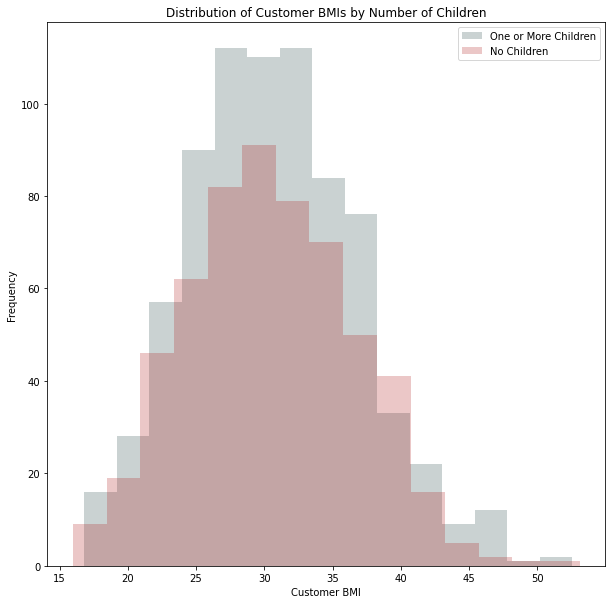

In [21]:
plt.figure(figsize=(10,10))
plt.hist(has_kids.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'darkslategray')
plt.hist(no_kids.bmi, bins = 15, histtype = 'bar', alpha = 0.25, color = 'firebrick')
plt.legend(['One or More Children', 'No Children'])
plt.title('Distribution of Customer BMIs by Number of Children')
plt.xlabel('Customer BMI')
plt.ylabel('Frequency')
plt.savefig('figure_5_kids_nokids_bmi.png')
plt.show()
plt.close('all')

There's no difference between these two distributions. They have the same shape, they peak at about the same place, and they have about the same width. I should demonstrate this with a hypothesis test, however. Since I want to test if two different distributions are consistent with having been drawn from the same underlying distribution, I will perform a 2-Sample T-test, with an <i>a priori</i> chosen significance threshold p-value of 0.003. The data are clearly normally distributed; I suspect that the two standard deviations are about the same, but I should also formally test to make sure that the ratio of standard deviations is about 1 before I perform the 2-Sample T-test.

In [22]:
# See what the ratio of standard deviations is:
has_kids_bmi_stddev = np.std(has_kids.bmi)
no_kids_bmi_stddev = np.std(no_kids.bmi)

print('Ratio of BMI distribution Standard Deviations: '+ str(has_kids_bmi_stddev/no_kids_bmi_stddev))

# Perform the 2-sample T-test:
kids_tstat, kids_pval = ttest_ind(has_kids.bmi, no_kids.bmi)
print('')
print('2-Sample T-Test p-value: ' + str(round(kids_pval,3)))

Ratio of BMI distribution Standard Deviations: 1.017718546323453

2-Sample T-Test p-value: 0.557


As suspected, the two distributions are not significantly different.

Thus I conclude that, in fact, having kids does not make you more likely to have a higher BMI.

<h2> Question 3: Are customers in one region more likely to smoke than customers in another region? </h2>

I will go back to using the DataFrames for each region of the U.S. to answer this question. To start off, let's look at the percentage of customers in each region who smoke compared to the percentage who do not smoke. I will make a bar plot to compare the percentages between regions.

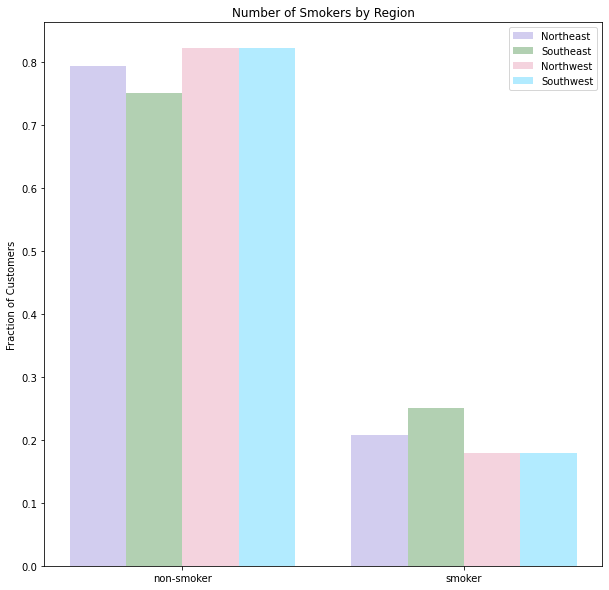

In [23]:
# Get the counts of smokers and non-smokers and divide by the total number in each region:
ne_smoking_data = ne_insurance_data.smoker_mapped.value_counts()/len(ne_insurance_data)
se_smoking_data = se_insurance_data.smoker_mapped.value_counts()/len(se_insurance_data)
nw_smoking_data = nw_insurance_data.smoker_mapped.value_counts()/len(nw_insurance_data)
sw_smoking_data = sw_insurance_data.smoker_mapped.value_counts()/len(sw_insurance_data)

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# Northeast data:
n = 1 # This is the first dataset (out of 4) 
t = 4 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# Southeast data:
n = 2 # This is the second dataset (out of 4) 
t = 4 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]
# Northwest data:
n = 3 # This is the third dataset (out of 4) 
t = 4 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues3 = [t*element + w*n for element in range(d)]
# Southwest data:
n = 4 # This is the fourth dataset (out of 4) 
t = 4 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues4 = [t*element + w*n for element in range(d)]

# Get a nice center-of-the-bars value for labeling the horizontal axis of the upcoming plot:
centers = [xvalues1[i]+((xvalues4[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# Make the plot and save to file:
plt.figure(figsize=(10,10))
ax1 = plt.subplot()
plt.bar(xvalues1, ne_smoking_data, alpha = 0.3, color = 'slateblue')
plt.bar(xvalues2, se_smoking_data, alpha = 0.3, color = 'darkgreen')
plt.bar(xvalues3, nw_smoking_data, alpha = 0.3, color = 'palevioletred')
plt.bar(xvalues4, sw_smoking_data, alpha = 0.3, color = 'deepskyblue')
ax1.set_xticks(centers)
ax1.set_xticklabels(['non-smoker','smoker'])
plt.legend(['Northeast', 'Southeast', 'Northwest', 'Southwest'])
plt.title('Number of Smokers by Region')
plt.ylabel('Fraction of Customers')
plt.savefig('figure_6_percentage_smoker.png')
plt.show()
plt.close('all')

Just from the raw numbers, it looks as though a higher percentage of customers in the Southeast smoke than in any other region. The Northeast has the second-most, and the percentages are equal in the Northwest and Southwest (and the lowest). However, I should perform a Chi-Squared test on this categorical data to see if the differences I noted are significant. I will once again choose a p-value of 0.003 as the threshold for rejecting the null hypothesis.

In [24]:
# Print out the DataFrame value_counts() for inclusion in the contingency tables:
#print(ne_insurance_data.smoker_mapped.value_counts())
#print(se_insurance_data.smoker_mapped.value_counts())
#print(nw_insurance_data.smoker_mapped.value_counts())
#print(sw_insurance_data.smoker_mapped.value_counts())

# Create contingency tables for handing off to chi2_contingency():
# Contingency table arrangement: non-smokers, smokers are the columns; first row is table1, second row is table2
contingency_nese = [[257,67],[273,91]]
contingency_nenw = [[257,67],[267,58]]
contingency_nesw = [[257,67],[267,58]]

contingency_senw = [[273,91],[267,58]]
contingency_sesw = [[273,91],[267,58]]

contingency_nwsw = [[267,58],[267,58]]

# Perform the Chi-Squared tests:
chi2_nese, pvalue_nese, dof_nese, expected_nese = chi2_contingency(contingency_nese)
chi2_nenw, pvalue_nenw, dof_nenw, expected_nenw = chi2_contingency(contingency_nenw)
chi2_nese, pvalue_nesw, dof_nesw, expected_nesw = chi2_contingency(contingency_nesw)

chi2_senw, pvalue_senw, dof_senw, expected_senw = chi2_contingency(contingency_senw)
chi2_sesw, pvalue_sesw, dof_sesw, expected_sesw = chi2_contingency(contingency_sesw)

chi2_nwsw, pvalue_nwsw, dof_nwsw, expected_nwsw = chi2_contingency(contingency_nwsw)

# Output the results to the screen:
print('Northeast-Southeast Chi-Squared Test p-value: {}'.format(pvalue_nese))
print('Northeast-Northwest Chi-Squared Test p-value: {}'.format(pvalue_nenw))
print('Northeast-Southwest Chi-Squared Test p-value: {}'.format(pvalue_nesw))
print('Southeast-Northwest Chi-Squared Test p-value: {}'.format(pvalue_senw))
print('Southeast-Southwest Chi-Squared Test p-value: {}'.format(pvalue_sesw))
print('Northwest-Southwest Chi-Squared Test p-value: {}'.format(pvalue_nwsw))

Northeast-Southeast Chi-Squared Test p-value: 0.20975443993854986
Northeast-Northwest Chi-Squared Test p-value: 0.4147859367061002
Northeast-Southwest Chi-Squared Test p-value: 0.4147859367061002
Southeast-Northwest Chi-Squared Test p-value: 0.028943633277990207
Southeast-Southwest Chi-Squared Test p-value: 0.028943633277990207
Northwest-Southwest Chi-Squared Test p-value: 1.0


There is not a significant difference between the number of smokers in any region as compared to any other region, at least to my <i>a priori</i> chosen significance level. <br>
<br>
Thus I conclude that customers in one region are not more likely to smoke than customers in any other region.

<h2> Question 4a: Codecademy Hint: What's the average age of someone in the dataset? </h2>

This one's pretty easy to answer, at least if you have the data in a Pandas DataFrame and have imported NumPy:

In [25]:
print('Average age of a person in the dataset: {}'.format(round(np.mean(insurance_data.age)),1))

Average age of a person in the dataset: 39.0


<h2> Question 4b: My extension: What are the average ages per region? </h2>

This one is also easy to answer; there's just more DataFrames to calculate an average for.

In [26]:
avg_ne_age = round(np.median(ne_insurance_data.age),1)
avg_se_age = round(np.median(se_insurance_data.age),1)
avg_nw_age = round(np.median(nw_insurance_data.age),1)
avg_sw_age = round(np.median(sw_insurance_data.age),1)

print('Average age of customers living in the Northeast: {}'.format(avg_ne_age))
print('Average age of customers living in the Southeast: {}'.format(avg_se_age))
print('Average age of customers living in the Northwest: {}'.format(avg_nw_age))
print('Average age of customers living in the Southwest: {}'.format(avg_sw_age))

Average age of customers living in the Northeast: 39.5
Average age of customers living in the Southeast: 39.0
Average age of customers living in the Northwest: 39.0
Average age of customers living in the Southwest: 39.0


The average age of a customer in this data set is roughly 39. This does not vary by region.

<h2> Question 6a: Can I fit a multi-variable linear regression model to the data and/or KNNR model to the data to do better than the Codecademy predictive formula? </h2>

As I mentioned above when gathering up the DataFrame to be used in my analysis, I began to suspect that the equation for predicting customer charges that Codecademy gave me in its previous lessons was the result of a multi-variable linear regression model fit to the data. I know how to fit such a model, and I also know how to fit a K-Nearest Neighbours Regression (KNNR) model to a set of data, so I figured I'd go ahead and do that. My goal will be to see if either of my models qualitatively do a better job of predicting customer charges than the Codecademy equation. I hypothesize that my multi-variable linear regression model will do just as bad a job as Codecademy's equation, but I have hope that my KNNR model could fare better. <br>
Before doing anything, I will take a look at how charges depend on the other numeric variables in the DataFrame. I already know how it will depend on sex and smoking status, as I mapped those to 0 or 1, but it will be interesting to see how charges depend on the other, more continuous variables. Below I plot a series of scatter plots, with charges being on the vertical axis of each plot, and output the figure to file for later use.

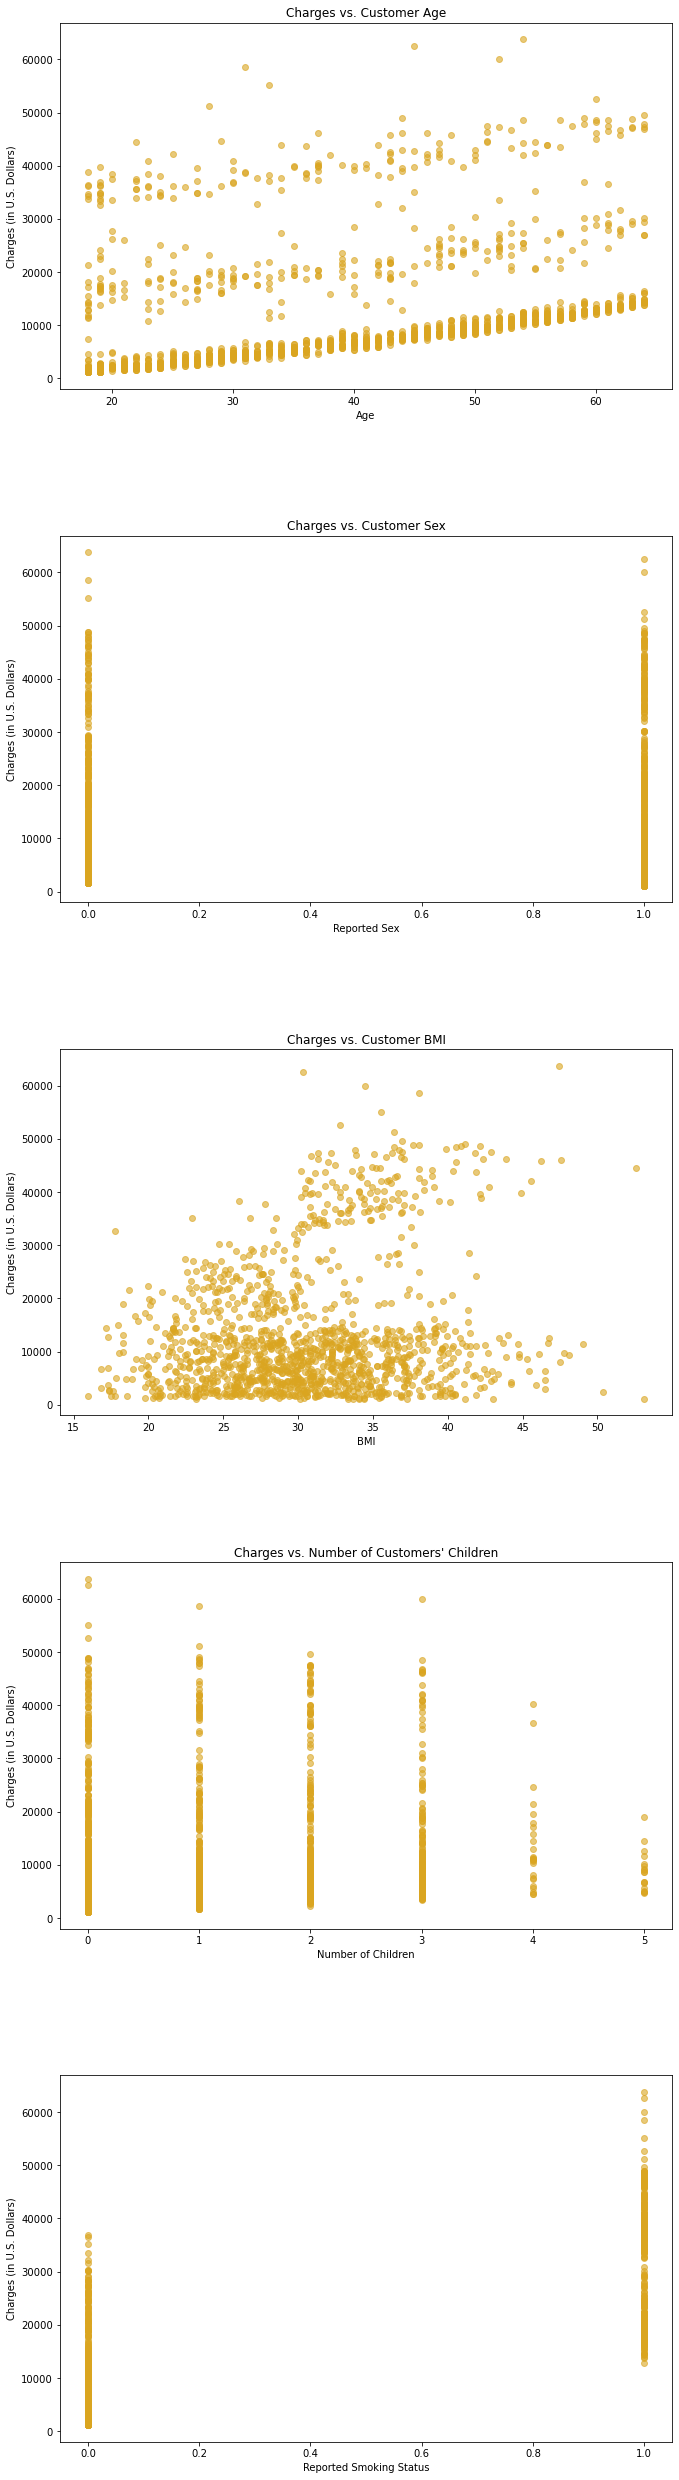

In [27]:
# Set up the figure and the margins for each subplot:
fig7 = plt.figure(figsize=(10,48))
fig7.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.2, top = 0.9, hspace = 0.4, wspace = 0)
# Plot charges vs. age:
fig7.add_subplot(5,1,1)
plt.scatter(insurance_data.age, insurance_data.charges, color = 'goldenrod', alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Charges (in U.S. Dollars)')
plt.title('Charges vs. Customer Age')
# Plot charges vs. sex:
fig7.add_subplot(5,1,2)
plt.scatter(insurance_data.sex_mapped, insurance_data.charges, color = 'goldenrod', alpha = 0.6)
plt.xlabel('Reported Sex')
plt.ylabel('Charges (in U.S. Dollars)')
plt.title('Charges vs. Customer Sex')
# Plot charges vs. BMI:
fig7.add_subplot(5,1,3)
plt.scatter(insurance_data.bmi, insurance_data.charges, color = 'goldenrod', alpha = 0.6)
plt.xlabel('BMI')
plt.ylabel('Charges (in U.S. Dollars)')
plt.title('Charges vs. Customer BMI')
# Plot charges vs. number of children:
fig7.add_subplot(5,1,4)
plt.scatter(insurance_data.children, insurance_data.charges, color = 'goldenrod', alpha = 0.6)
plt.xlabel('Number of Children')
plt.ylabel('Charges (in U.S. Dollars)')
plt.title("Charges vs. Number of Customers' Children")
# Plot charges vs. smoking status:
fig7.add_subplot(5,1,5)
plt.scatter(insurance_data.smoker_mapped, insurance_data.charges, color = 'goldenrod', alpha = 0.6)
plt.xlabel('Reported Smoking Status')
plt.ylabel('Charges (in U.S. Dollars)')
plt.savefig('figure_7_charges_vs_all.png')
plt.show()
plt.close('all')

As one would expect, there are two vertical bars for the charges vs. reported sex plot; one at 0 and one at 1, because that's what I mapped "male" and "female" to. Similarly for charges vs. reported smoking status; there's a vertical line at 0 for non-smokers and one at 1 for smokers (whose "base" charges are higher than those of non-smokers). There are multiple vertical lines for the charges vs. number of children plot, corresponding to the number of children each customer has, and sure enough the "base" charge goes up with each additional child. Charges vs. BMI is a bit of a mess, with a broad region near ~\\$10,000 which extends the bulk of the horizontal axis, and a broad, sparse region at higher charges which also has a large width. What was most interesting to me was the charges vs. age plot. There are three different, clear lines which span the horizontal axis and which clearly separate from each other on the vertical axis. All three trend up with increasing age. The bottom-most curve is narrow, while the upper two curves are much broader. All three curves span the entire age range. WHAT IS GOING ON WITH THIS PLOT? This data structure is so fascinating. Why are there three distinct lines? Why are the patterns so well ordered? Why are the lines so well separated? <br>
Getting a full explanation for what is going on with the charges vs. age plot is probably beyond the scope of this project. However, fitting a multi-variable linear regression model to the data is not beyond the scope of this project, nor is fitting a KNNR model to the data. I will accomplish these model fittings below.

In [29]:
# Select the features to fit to a model:
fit_features = insurance_data[['age','sex_mapped','bmi','children','smoker_mapped']]
fit_values = insurance_data['charges']

# Split the data into training and test sets. A customary splitting of 80% training, 20% test is used.
feat_train, feat_test, values_train, values_test =  \
      train_test_split(fit_features, fit_values, train_size = 0.80, test_size = 0.20, random_state = 13)

# Build the linear regression model:
lin_regress = LinearRegression()
lin_regress.fit(feat_train, values_train)

print('Coefficients of Best-Fit Line:')
print(lin_regress.coef_)
print("Intercept of Best-Fit Line:")
print(lin_regress.intercept_)

# Predict charges, and print out the coefficient of determination:
lin_regress_predict = lin_regress.predict(feat_test)
print('Model Coefficient of Determination: ' + str(round(lin_regress.score(feat_test, values_test),3)))

Coefficients of Best-Fit Line:
[2.58579765e+02 1.74958518e+01 3.24211597e+02 5.22313768e+02
 2.37988144e+04]
Intercept of Best-Fit Line:
-12081.392954282821
Model Coefficient of Determination: 0.797


Those model coefficients are ... unsurprisingly similar to the coefficients in the equation from Codecademy. It looks as though I've figured out how they generated that equation. 
<br> A "goodness of fit" of 0.8 isn't bad, but I want to see if a KNNR model will do any better. I don't know <i>a priori</i> what the optimum number of neighbours to consider is, so I will leave that as a free parameter and choose the one which results in the best coefficient of determination. Also, I absolutely have to scale the data before handing it off to the KNNR algorithm. I will use Scikit-Learn's StandardScaler to perform that scaling.

In [30]:
# Apply a "standard" scaling to the data (remove the mean, scale to unit variance):
stdscale = StandardScaler()
scaled_train_f = stdscale.fit_transform(feat_train)
scaled_test_f = stdscale.transform(feat_test)

# An empty array to store model scores:
scores = []

# Loop over a range of ks, build a KNNR model, and calculate the coefficient of determination when applied 
# to the test data:
for k in range(1,101):
    regressor = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    regressor.fit(scaled_train_f, values_train)
    scores.append(regressor.score(scaled_test_f, values_test))
    
print('Best-fit number of neighbours: {}'.format(scores.index(max(scores))+1))

# Build the "final" model with the k which maximimzed the coefficient of determination:
knnr_regress = KNeighborsRegressor(n_neighbors = scores.index(max(scores))+1, weights = 'distance')
knnr_regress.fit(scaled_train_f, values_train)

# Predict charges, and print out the coefficient of determination:
knnr_predict = knnr_regress.predict(scaled_test_f)
knnr_score = knnr_regress.score(scaled_test_f, values_test)
print('Model Coefficient of Determination: ' + str(round(knnr_score,3)))

Best-fit number of neighbours: 18
Model Coefficient of Determination: 0.899


Sure enough, I was in fact able to build a KNNR model which resulted in a better coefficient of determination than the linear regression model did.  <br>
I want to have a look at how coefficient of determination varied with k, to make sure nothing obvious has gone wrong:

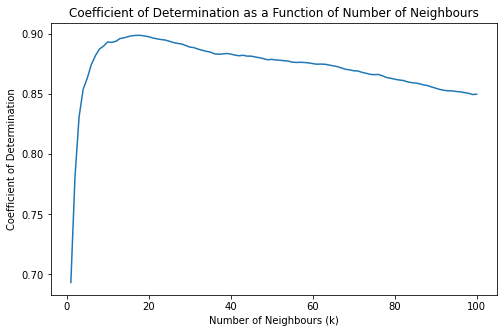

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1,101),scores)
plt.xlabel('Number of Neighbours (k)')
plt.ylabel('Coefficient of Determination')
plt.title('Coefficient of Determination as a Function of Number of Neighbours')
plt.savefig('figure_8_rsquared_v_k.png')
plt.show()
plt.close('all')

This plot follows the trend that I would expect: increasing coefficient of determination with increasing k initially, reaching a peak, and then decreasing coefficient of determination as k continues to increase. While this can't assure that my model is absolutely correct and free from errors, it does indicate that nothing major has gone catastrophically wrong. <br>
<br>
I did want to see how well my models did qualitatively, and how that qualitatively compares to Codecademy's prediction equation. The latter is pretty much identical to my multi-variable linear regression model, so the main questions is seeing how that looks compared to the KNNR model I built. A plot is best for this qualitative comparison. In it, I will plot a scatter plot of actual charges on the horizontal axis and predicted charges on the vertical axis. I will also plot a line along which predicted charge = actual charge; if a model has accurately predicted the charges for a patient, that data point will fall exactly on that line. There will be 3 sets of data points in this plot: my multi-variable linear regression model, my KNNR model, and the predictions from Codecademy's equation. Note that the latter will be for all data points rather than just the test set.

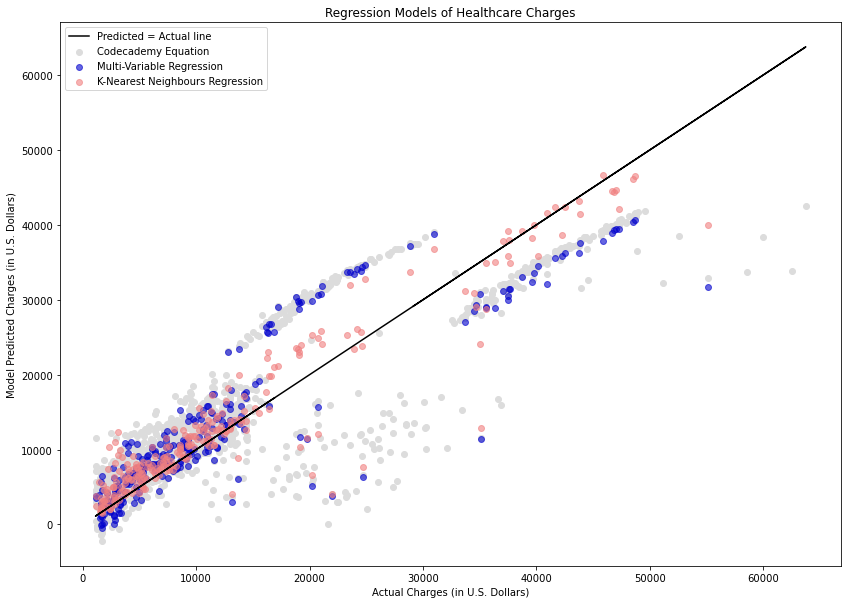

In [32]:
# Set up the actual = predicted line:
equal_line = fit_values

# Plot actual vs. predicted values:
plt.figure(figsize=(14,10))
plt.scatter(insurance_data.charges, insurance_data.predicted_charges, color = 'gainsboro', alpha = 1)
plt.scatter(values_test, lin_regress_predict, color = 'mediumblue', alpha = 0.6)
plt.scatter(values_test, knnr_predict, color = 'lightcoral', alpha = 0.6)
plt.plot(fit_values, equal_line, color = 'black')
plt.xlabel('Actual Charges (in U.S. Dollars)')
plt.ylabel('Model Predicted Charges (in U.S. Dollars)')
plt.title('Regression Models of Healthcare Charges')
plt.legend(['Predicted = Actual line','Codecademy Equation',\
            'Multi-Variable Regression','K-Nearest Neighbours Regression'])
plt.savefig('figure_9_model_results.png')
plt.show()
plt.close('all')

The predicted charges which resulted from using Codecademy's equation track my multi-variable linear regression model predictions closely. The predictions from my KNNR model are more tightly clustered on the predicted = actual line, and show slightly less structure than my multi-variable linear regression model. The latter seems to be echoing some of the structure in the charges vs. age plot. I believe that the KNNR model does not echo this structure as strongly because of the nature of the KNNR algorithm. That algorithm looks at the (here) 18 nearest neighbours of a given point in order to make its charges prediction, so it will be able to "find" which line a data point "belongs" on given the closest 18 neighbours in terms of (multi-dimensional) distance.

<h2> Question 6b: Is the Codecademy prediction formula just a multi-variable linear regression fit to the data? </h2>

In short, yes.

Here is my evidence for this. Consider the coefficients of the multi-variable linear regression model I fit to the data, multiplied by the appropriate variable, with intercept:

`my_prediction_line = (259.0*age) + (175.0*sex_mapped) + (324.0*bmi) + (522.0*children) + \
                      (23800.0*smoker_mapped) - 12100.0`

Now consider Codecademy's prediction equation:

`codecademy_prediction_line = (250.0*age) - (128.0*sex_mapped) + (370.0*bmi) + (425.0*children) + \
                             (24000.0*smoker_mapped) - 12500.0`

The coefficients aren't exactly the same, of course, but they're not too far off, and since my prediction line was constructed from a training subset of the data, the precise value of the coefficients would no doubt shift a little bit if certain rows were swapped between the training and test sets. I suspect that Codecademy fit their multi-variable linear regression model to the data as a whole. 

I also offer as evidence the plot I made of actual costs vs. predicted costs above; the data points resulting from using Codecademy's equation fall much closer to my multi-variable linear regression model than to my KNNR model.

Regarding my suspicion that Codecademy used the full data set to build a multi-variable linear regression model for this data set, I can do the same and see if I get what they got. I accomplish this below.

In [33]:
# features to fit to model:
all_features = insurance_data[['age','sex_mapped','bmi','children','smoker_mapped']]
all_values = insurance_data['charges']

# Build the linear regression model:
mv_lin_regress = LinearRegression()
mv_lin_regress.fit(all_features, all_values)

print('Full Data Set Linear Regression Coefficients:')
print(mv_lin_regress.coef_)
print('Full Data Set Intercept:')
print(mv_lin_regress.intercept_)

# Predict median house values, and print out the coefficient of determination:
mv_lin_regress_predict = mv_lin_regress.predict(all_features)
print('Full Data Set Coefficient of Determiation: ' + str(round(mv_lin_regress.score(all_features, all_values),3)))

# So, the formula given to us by Codecademy is just the linear regression model fit to the data, with the coefficients
# rounded to 2 or 3 "sig figs."
# No wonder it's pretty off a good deal of the time!

Full Data Set Linear Regression Coefficients:
[  257.73498767  -128.63985357   322.36421449   474.41112061
 23823.39253065]
Full Data Set Intercept:
-12052.461985664719
Full Data Set Coefficient of Determiation: 0.75


Now that I've used the full data set to fit a multi-variable linear regression model to the data, let's compare what I got with what Codecademy got:

My model:
`my_prediction_line = (258.0*age) - (129.0*sex_mapped) + (322.0*bmi) + (474.0*children) + \
                      (23800.0*smoker_mapped) - 12100.0`

Codecademy's model:

`codecademy_prediction_line = (250.0*age) - (128.0*sex_mapped) + (370.0*bmi) + (425.0*children) + \
                             (24000.0*smoker_mapped) - 12500.0`

Closer, but still not quite the same. Perhaps they normalized the features before fitting their model, or maybe they used a subset of data that is different from the training set I used and the full data set used immediately above.

<h2> Addendum: What is going on with those lines of data in 'age'? </h2>

As I noted above, the structure of my charges vs. age scatter plot was very interesting. There were three different, clear lines which spanned the horizontal axis and which clearly separated from each other on the vertical axis. All three lines trended up with increasing age. The bottom-most curve was narrow, while the upper two curves were much broader. All three curves spanned the entire age range. I will briefly try to address the question, "Why are there three distinct lines?" I will first see if the lines have something to do with the region the customer lives in; then I will see if the lines have something to do with the number of children a customer has.

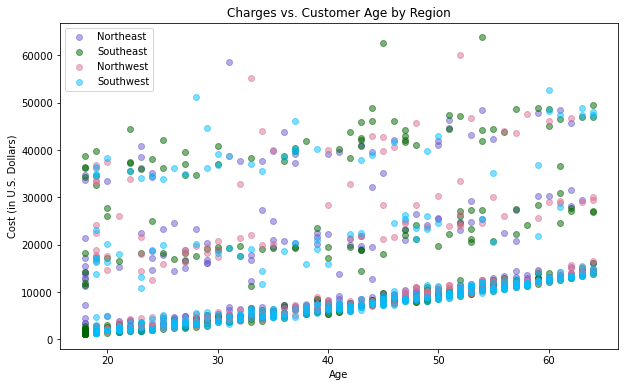

In [34]:
# Do the three lines in the charges vs. age scatter plot represent different regions?

plt.figure(figsize=(10,6))
plt.scatter(ne_insurance_data.age, ne_insurance_data.charges, alpha = 0.5, color = 'slateblue')
plt.scatter(se_insurance_data.age, se_insurance_data.charges, alpha = 0.5, color = 'darkgreen')
plt.scatter(nw_insurance_data.age, nw_insurance_data.charges, alpha = 0.5, color = 'palevioletred')
plt.scatter(sw_insurance_data.age, sw_insurance_data.charges, alpha = 0.5, color = 'deepskyblue')
plt.legend(['Northeast', 'Southeast', 'Northwest', 'Southwest'])
plt.title('Charges vs. Customer Age by Region')
plt.xlabel('Age')
plt.ylabel('Cost (in U.S. Dollars)')
plt.show()
plt.close('all')

# Nope.

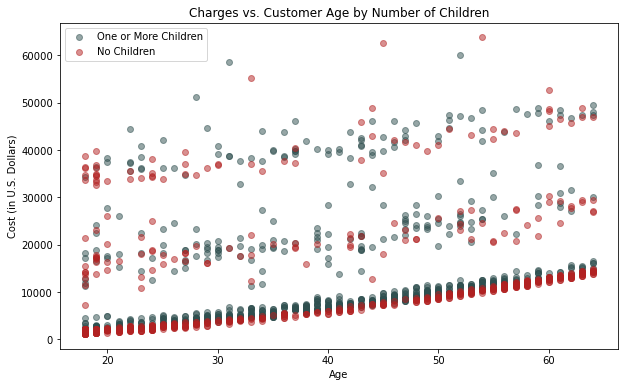

In [35]:
# Do the three lines in the charges vs. age scatter plot represent the number of children a customer has?

plt.figure(figsize=(10,6))
plt.scatter(has_kids.age, has_kids.charges, alpha = 0.5, color = 'darkslategrey')
plt.scatter(no_kids.age, no_kids.charges, alpha = 0.5, color = 'firebrick')
plt.legend(['One or More Children', 'No Children'])
plt.title('Charges vs. Customer Age by Number of Children')
plt.xlabel('Age')
plt.ylabel('Cost (in U.S. Dollars)')
plt.show()
plt.close('all')

# Nope.

In short, I see the same three-line structure when splitting the data by region and when splitting the data by number of children. So, neither of those seem to be the cause of the underlying structure. I suspect, however, that the underlying structure probably has to do with factors that this data set does not account for. It's not clear from the Kaggle website which year the data were pulled from, but it's possible that some of the customers in this data set had unexpected medical expenses that particular year, perhaps as the result of a major illness or accident. This data set also does not indicate whether or not a customer had an underlying condition, and it's quite possible that customers with underlying conditions incur higher charges than those without underlying conditions. Since this data set does not include this information, it's impossible to tell whether any of those factors could be influencing this scatter plot.

<h1 style="text-align:center"> Acknowledgements </h1>

This project was a Codecademy Portfolio Project, so I would like to thank the curriculum developers at Codecademy for gathering up the resource needed to complete this project, as well as the structure they created to help track your progress through it. Codecademy references the following Kaggle user as being the compiler of the data set: <br>
https://www.kaggle.com/mirichoi0218/insurance <br>
According to the Kaggle page, this is an open database released in the public domain. I would like to thank the Kaggle user for the work they did in cleaning up the data base and posting it to their Kaggle page.